# Analisis exploratorio de los datos


# Liberias y DFs

In [227]:
#Importar librerias a usar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pycountry
import plotly.express as px
import zepid
from zepid.graphics import EffectMeasurePlot
import networkx as nx
from numpy import genfromtxt

#Creación de data frames a usar
df_metadata = pd.read_csv("c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\Tabla Normalizada - Metadata.csv")
df_data_type = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\Tabla Normalizada - Data type.csv')
df_participants = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\Tabla Normalizada - Participants.csv')
df_self_report = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\Tabla Normalizada - Self report.csv')
df_emotion_elicitation_techniques = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\Tabla Normalizada - Emotion elicitation techniques.csv')
df_eda = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\Tabla Normalizada - EDA.csv')
df_statistical_learning_models = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\Tabla Normalizada - Statistical Learning model.csv')
df_performances = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\Tabla Normalizada - Performances.csv')
df_alg_perf = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\Tabla Normalizada - Alg_Perf.csv')

# Set tamaño de gráficos para todos

In [228]:
plt.rcParams['figure.figsize'] = [20, 10]

# Gráficos

* La lista de los gráficos se encuentra en el README de esta carpeta (notebooks/README.md)

## 1. Gráfico de barra por año (2010-2020) por paper según modelos de emociones empleado (categoriales o dimensionales)

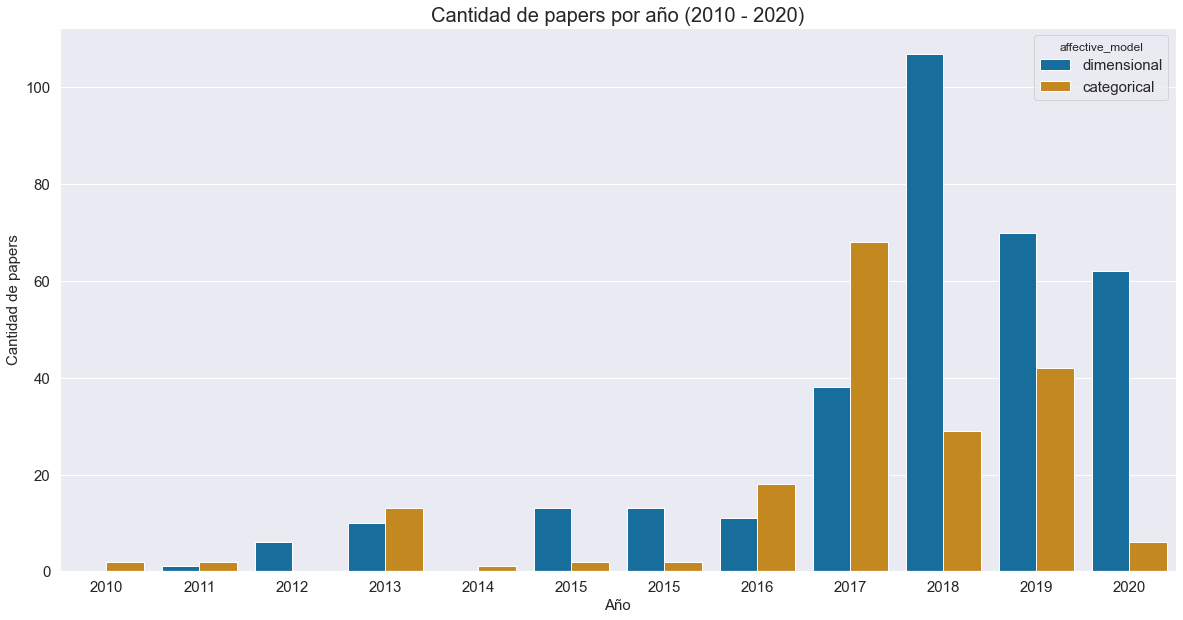

In [229]:
#rellenar datos faltantes y NO SE DROPEAN los duplicados (hay papers que usan multiples modelos)
df_statistical_learning_models=df_statistical_learning_models.fillna('-')

#ploteo
sns.set_style("darkgrid")
sns.set_palette('colorblind')
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20

category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
g= sns.countplot(x='year', 
    data= df_statistical_learning_models, 
    hue='affective_model', 
    order=category_order)
g.set(title = 'Cantidad de papers por año (2010 - 2020)', xlabel = 'Año', ylabel = 'Cantidad de papers')
plt.show()



## 2. Análisis estadístico para determinar si modelos de detección de arousal performan mejor que los basados en valence (Algoritmos de clasificación)
- Procedimiento: subsetear para quedarnos con modelos dimensionales(columna affective model), quedarse solo con clasificación binarias (LA,HA/LV,HV), quedarse con la medida de performance que mas aparezca (hacer count). hacer el test estadístico correspondiente (t, wettney, etc), que depende del supuesto (si hay normalidad se aplica paramétrico, sino no-parametrico).
- Resultado: no existe diferencia estadisticamente significativa entre grupos, por lo que los algoritmos clasificadores basados en modelos dimensionales de clasificacion binaria (HA/LA, HV/LV) no performan mejor uno sobre otros (Segun t de student y u de mann-whitney).
- Tener en cuenta el tamaño de la muestra que cumple con todos los criterios mencionados en el Procedimiento: 10 modelos en total.

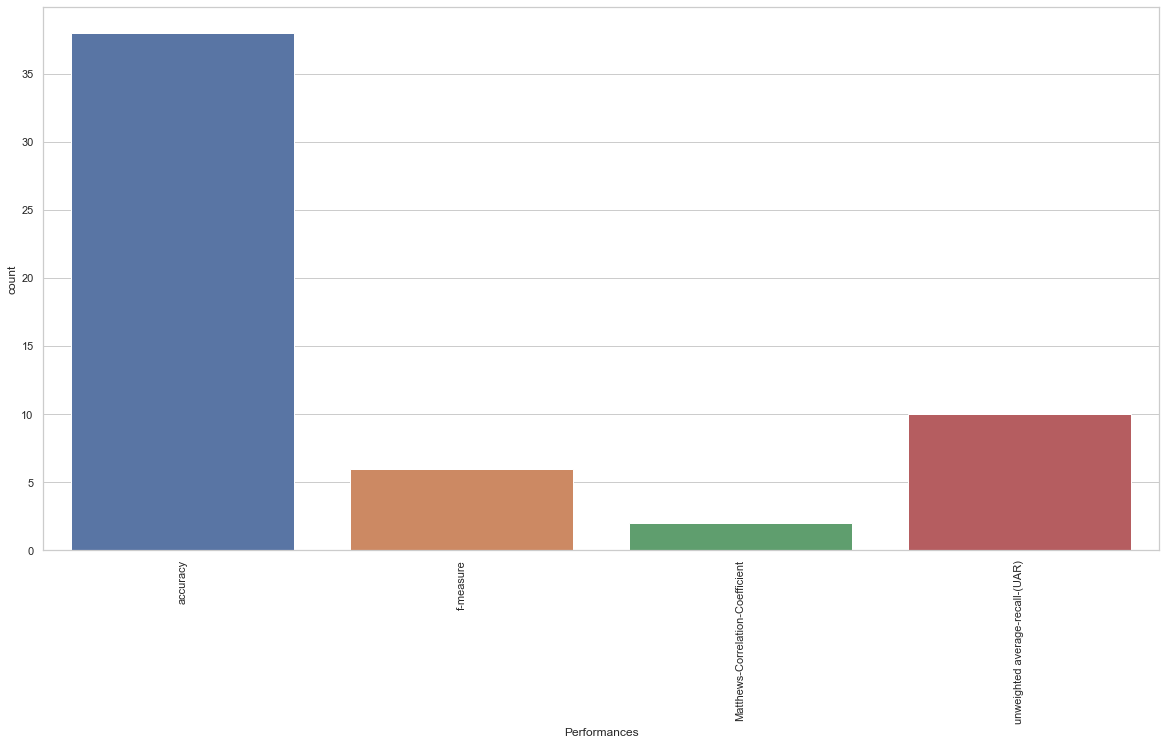

    paper_id model_id                                       apa_citation  \
341        -        -  Sharma, V., Prakash, N. R., & Kalra, P. (2019)...   
342        -        -  Sharma, V., Prakash, N. R., & Kalra, P. (2019)...   
345        -        -  Greco, A., Marzi, C., Lanata, A., Scilingo, E....   
346        -        -  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
347        -        -  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
348        -        -  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
349        -        -  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
350        -        -  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
351        -        -  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
352        -        -  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
353        -        -  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
354        -        -  Ganapathy, N., Veeranki, Y. R., & Swaminathan,...   
355        -

In [230]:
#creacion data frame y subseteo por: modelos dimensionales, tipo clasiffier, categorias HA/LA y HV/LV
df_2 = df_alg_perf
df_2 = df_2[df_2['affective_model'] == 'dimensional']
df_2 = df_2[df_2['is_classifier'].isin(['x', 'X'])]
df_2 = df_2[df_2['class_model_output_categories'].isin(['HA, LA', 'HV, LV'])]

#que medida de performance mas aparece en este grupo?
#dataframe con performances
title_dimensions = df_2[['apa_citation', 'class_model_output_categories']]

df2_performance_medidas = df_2.iloc[:,58:]

df2_performance_medidas = df2_performance_medidas.fillna('-')
df2_performance_medidas.to_excel('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\df2_performance_medidas.xlsx')

#búsqueda de la medida de performance que mas aparece, paso de datos a 0 y 1 para facilitar su conteo
df2_performance_medidas = df2_performance_medidas.fillna('No')
df2_performance_medidas = df2_performance_medidas.replace('-', 'No')
df2_performance_medidas = df2_performance_medidas.mask(df2_performance_medidas != 'No','Yes')

def get_value(row):
    for c in df2_performance_medidas.columns:
        if row[c] == 'Yes':
            return c

df2_performance_medidas = df2_performance_medidas.apply(get_value, axis=1)
df2_performance_medidas = pd.DataFrame(df2_performance_medidas)
df2_performance_medidas.columns = ['Performances']

#ploteo para determinar la medida de performance mas recurrente
sns.set_theme(style="whitegrid", context = 'notebook')
sns.countplot(x='Performances', data=df2_performance_medidas)
plt.xticks(rotation=90)
plt.show()

#subseteo por la medida de performance que mas aparece (accuracy)
df_2 = df_2.fillna('-')
df_2 = df_2[df_2['accuracy'] != '-']

print(df_2)
#la muestra es de 10 modelos


Aplicamos los estadísticos

obtenido de: https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [231]:
df_arousal = df_2[df_2['class_model_output_categories'] == 'HA, LA']
df_arousal = df_arousal['accuracy']
arousal1 = df_arousal.values.tolist()
arousal1 = list(map(float, arousal1))

df_valence = df_2[df_2['class_model_output_categories'] == 'HV, LV']
df_valence = df_valence['accuracy']
valence1 = df_valence.values.tolist()
valence1 = list(map(float, valence1))

#Test parametrico - t de student
print('Students t-test')
from scipy.stats import ttest_ind
stat, p = ttest_ind(arousal1, valence1, alternative = 'greater')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


#Test no parametrico - U de Mann-Whitney
print('Mann-Whitney U Test')
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(arousal1, valence1, alternative = 'greater')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Students t-test
stat=0.777, p=0.221
Probably the same distribution
Mann-Whitney U Test
stat=210.000, p=0.194
Probably the same distribution


##  (obsoleto) Cambios, teniendo en cuenta los resultados obtenidos en el analisis exploratorio y estadistico anterior

* Se partia del analisis hecho primeramente, sobre que la medida mas usada era UAR, y los papers sacados aca no corresponden con los que podrian ser ahora que se sabe cual es la mas frecuente (accuracy). Para actualizarse esta parte debe tenerse en cuenta eso.
* Nos quedamos solo con los modelos de clasificacion, y tenemos en cuenta los papers que posean ambos (High y Low para arousal y valencia)
* Solamente se dropearon dos papers, que testeaban solo modelos o de valencia o de arousal. Con esto se prosiguió con el análisis estadístico y los resultados fueron los mismos

    accuracy precision f-measure recall-sensitivity-true_positive_rate  \
341       79       NaN       NaN                                   NaN   
342     69.8       NaN       NaN                                   NaN   
346       72     55.78     71.41                                 99.24   
347    58.52     54.74     51.19                                 51.76   
348     54.5     54.79     69.92                                 96.61   
349     51.9     53.67     61.32                                 71.53   
350     52.7     55.05     68.88                                 91.99   
351     50.8     56.86     57.51                                 58.18   
352       75      66.1      79.3                                  99.2   
353    54.05     49.88     49.87                                 49.86   
354     64.4     66.05     78.25                                  95.9   
355     65.5     64.34      78.3                                   100   
356     63.3     64.14     77.13      

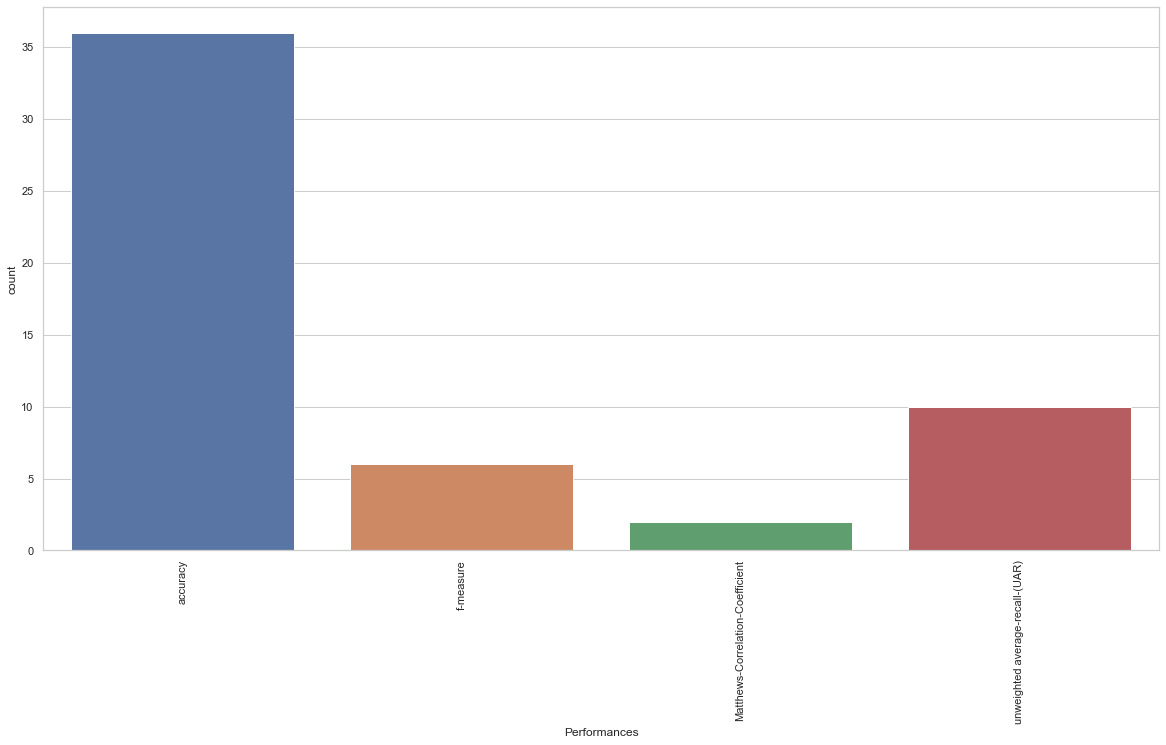

In [232]:
papers_titles = title_dimensions.drop_duplicates(subset='apa_citation')

#Kołodziej, M., Tarnowski, P., Majkowski, A., &...   vuela
#Greco, A., Marzi, C., Lanata, A., Scilingo, E.

title_dimensions = title_dimensions.drop(index=345)
title_dimensions = title_dimensions.drop(index=492)
#print(title_dimensions)

df_3 = df_alg_perf
df_3 = df_3[df_3['affective_model'] == 'dimensional']
df_3 = df_3[df_3['is_classifier'].isin(['x', 'X'])]
df_3 = df_3[df_3['class_model_output_categories'].isin(['HA, LA', 'HV, LV'])]



df_3 = df_3.drop(index=345)
df_3 = df_3.drop(index=492)

df3_performance_medidas = df_3.iloc[:,58:]

print(df3_performance_medidas)

#búsqueda de la medida de performance que mas aparece, paso de datos a 0 y 1 para facilitar su conteo
df3_performance_medidas = df3_performance_medidas.fillna('No')
df3_performance_medidas = df3_performance_medidas.replace('-', 'No')
df3_performance_medidas = df3_performance_medidas.mask(df3_performance_medidas != 'No','Yes')

def get_value(row):
    for c in df3_performance_medidas.columns:
        if row[c] == 'Yes':
            return c

df3_performance_medidas = df3_performance_medidas.apply(get_value, axis=1)
df3_performance_medidas = pd.DataFrame(df3_performance_medidas)
df3_performance_medidas.columns = ['Performances']

#ploteo para determinar la medida de performance mas recurrente
sns.set_theme(style="whitegrid", context = 'notebook')
sns.countplot(x='Performances', data=df3_performance_medidas)
plt.xticks(rotation=90)
plt.show()

#subseteo por la medida de performance que mas aparece (UAR)
df_3 = df_3.fillna('-')
df_3 = df_3[df_3['unweighted average-recall-(UAR)'] != '-']

In [233]:
df_arousal = df_3[df_3['class_model_output_categories'] == 'HA, LA']
df_arousal = df_arousal['accuracy']
arousal = df_arousal.values.tolist()
arousal = list(map(float, arousal))

df_valence = df_3[df_3['class_model_output_categories'] == 'HV, LV']
df_valence = df_valence['accuracy']
valence = df_valence.values.tolist()
valence = list(map(float, valence))

#Test parametrico - t de student
print('Students t-test')
from scipy.stats import ttest_ind
stat, p = ttest_ind(arousal, valence, alternative = 'greater')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


#Test no parametrico - U de Mann-Whitney
print('Mann-Whitney U Test')
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(arousal, valence, alternative = 'greater')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

ValueError: could not convert string to float: '-'

Lo mismo pero con HAHV, HALV, LAHV, LALV

In [ ]:
#creacion data frame y subseteo por: modelos dimensionales, tipo clasiffier, categorias HA/LA y HV/LV
df_hvlv_hala = df_alg_perf
df_hvlv_hala = df_hvlv_hala[df_hvlv_hala['affective_model'] == 'dimensional']
df_hvlv_hala = df_hvlv_hala[df_hvlv_hala['is_classifier'].isin(['x', 'X'])]
df_hvlv_hala = df_hvlv_hala[df_hvlv_hala['class_model_output_categories'].isin(['HAHV, HALV, LAHV, LALV'])]

#que medida de performance mas aparece en este grupo?
#dataframe con performances
title_dimensions_hvlv_hala = df_hvlv_hala[['apa_citation', 'class_model_output_categories']]

df_hvlv_hala_performances = df_hvlv_hala.iloc[:,58:]
df_hvlv_hala_performances = df_hvlv_hala_performances.fillna('-')

print(df_hvlv_hala_performances)





#creacion data frame y subseteo por: modelos dimensionales, tipo clasiffier, categorias HA/LA y HV/LV
df_2 = df_alg_perf
df_2 = df_2[df_2['affective_model'] == 'dimensional']
df_2 = df_2[df_2['is_classifier'].isin(['x', 'X'])]
df_2 = df_2[df_2['class_model_output_categories'].isin(['HA, LA', 'HV, LV'])]

#que medida de performance mas aparece en este grupo?
#dataframe con performances
title_dimensions = df_2[['apa_citation', 'class_model_output_categories']]

df2_performance_medidas = df_2.iloc[:,67:]

#búsqueda de la medida de performance que mas aparece, paso de datos a 0 y 1 para facilitar su conteo
df2_performance_medidas = df2_performance_medidas.fillna('No')
df2_performance_medidas = df2_performance_medidas.replace('-', 'No')
df2_performance_medidas = df2_performance_medidas.mask(df2_performance_medidas != 'No','Yes')

def get_value(row):
    for c in df2_performance_medidas.columns:
        if row[c] == 'Yes':
            return c

df2_performance_medidas = df2_performance_medidas.apply(get_value, axis=1)
df2_performance_medidas = pd.DataFrame(df2_performance_medidas)
df2_performance_medidas.columns = ['Performances']

#ploteo para determinar la medida de performance mas recurrente
sns.set_theme(style="whitegrid", context = 'notebook')
sns.countplot(x='Performances', data=df2_performance_medidas)
plt.xticks(rotation=90)
plt.show()

#subseteo por la medida de performance que mas aparece (UAR)
df_2 = df_2.fillna('-')
df_2 = df_2[df_2['unweighted average-recall-(UAR)'] != '-']

print(df_2)
#la muestra es de 10 modelos

df_arousal = df_3[df_3['class_model_output_categories'] == 'HA, LA']
df_arousal = df_arousal['unweighted average-recall-(UAR)']
arousal = df_arousal.values.tolist()
arousal = list(map(float, arousal))

df_valence = df_3[df_3['class_model_output_categories'] == 'HV, LV']
df_valence = df_valence['unweighted average-recall-(UAR)']
valence = df_valence.values.tolist()
valence = list(map(float, valence))

#Test parametrico - t de student
print('Students t-test')
from scipy.stats import ttest_ind
stat, p = ttest_ind(arousal, valence, alternative = 'greater')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


#Test no parametrico - U de Mann-Whitney
print('Mann-Whitney U Test')
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(arousal, valence, alternative = 'greater')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

## 3. Gráficos frencuencia de los modelos algoritimicos, según modelos de regresión y clasificación

- Interpretaciones: Los algoritmos clasificadores son por mucho los mas usados, ademas de ser los que mas variedad representan. Que implica esto? Es lo mismo aplicar algoritmos clasificadores o regresores?
- Nota: ordenar los valores de los gráficos y unirlos en uno, buscar graficar los mas usados (primeros 5 o 10) 

In [ ]:
#para regressor
df_algoritmos_regre = df_statistical_learning_models.iloc[:,43:57]

def get_value(row):
     for c in df_algoritmos_regre.columns:
         if row[c]== 'x':
             return c

df_algoritmos_regre = df_algoritmos_regre.apply(get_value, axis=1)
df_algoritmos_regre = pd.DataFrame(df_algoritmos_regre)
df_algoritmos_regre.columns = ['Algorithms']

#Lista de algoritmos unicos de regresion
algoritmos_de_regresion = df_algoritmos_regre["Algorithms"].unique()
#print(algoritmos_de_regresion)

sns.set_style("darkgrid")
sns.set_palette('colorblind')
g = sns.countplot(x='Algorithms', data=df_algoritmos_regre, order=df_algoritmos_regre.Algorithms.value_counts().index)
g.set(title = 'Cantidad de modelos de tipo regressor', xlabel = 'Algoritmo', ylabel = 'Cantidad de modelos')
plt.xticks(rotation=90)
plt.show()

#para classifier
df_algoritmos_class = df_statistical_learning_models.iloc[:,8:40]
def get_value(row):
     for c in df_algoritmos_class.columns:
         if row[c]== 'x':
             return c

df_algoritmos_class = df_algoritmos_class.apply(get_value, axis=1)
df_algoritmos_class = pd.DataFrame(df_algoritmos_class)
df_algoritmos_class.columns = ['Algorithms']

#Lista de algoritmos unicos de clasificacion
algoritmos_de_clasificacion = df_algoritmos_class["Algorithms"].unique()
print(algoritmos_de_clasificacion)

sns.set_style("darkgrid")
sns.set_palette('colorblind')
g = sns.countplot(x='Algorithms', data=df_algoritmos_class, order=df_algoritmos_class.Algorithms.value_counts().index)
g.set(title = 'Cantidad de modelos de tipo classifier', xlabel = 'Algoritmo', ylabel = 'Cantidad de modelos')
plt.xticks(rotation=90)
plt.show()

#cantidad de modelos por tipo (regressor o clasiffier)
df_class_or_regre = df_statistical_learning_models.iloc[:,[5,40]]
def get_value(row):
     for c in df_class_or_regre.columns:
         if row[c]== 'x':
             return c

df_class_or_regre = df_class_or_regre.apply(get_value, axis=1)
df_class_or_regre = pd.DataFrame(df_class_or_regre)
df_class_or_regre.columns = ['Algorithms']

sns.set_style("darkgrid")
sns.set_palette('colorblind')
sns.countplot(x='Algorithms', data=df_class_or_regre)
plt.xticks(rotation=90)
plt.show()

#pie plot
quantity = df_class_or_regre['Algorithms'].value_counts()
df_class_or_regre_quantity = pd.DataFrame(quantity)

sns.set_style("darkgrid")
sns.set_palette('colorblind')
names = 'Classifier', 'Regressor'
plt.pie(df_class_or_regre_quantity['Algorithms'], labels = names, labeldistance = 1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.show()


## 4. Gráfico frencuencia de los tipos de elicitation (por modalidad o tecnica especifica)

Nota: Falta organizar bien la data en la tabla, para obtener las siguientes barras: multimodal, modalidad visual, mod auditory, mod somatosensory

In [ ]:
#frecuencia tipos elicitation por modalidad

df_emotion_elicitation_techniques=df_emotion_elicitation_techniques.fillna('-')
df_emotion_elicitation_techniques_sin_duplicates = df_emotion_elicitation_techniques.drop_duplicates(subset='paper_id')

df_eli_modalidad = df_emotion_elicitation_techniques_sin_duplicates.iloc[:,3:7]
def get_value(row):
     for c in df_eli_modalidad.columns:
         if row[c]== 'x':
             return c

df_eli_modalidad = df_eli_modalidad.apply(get_value, axis=1)
df_eli_modalidad = pd.DataFrame(df_eli_modalidad)
df_eli_modalidad.columns = ['Elicitation modality']

sns.set_theme(style="whitegrid", context = 'notebook')
sns.countplot(x='Elicitation modality', data=df_eli_modalidad)
plt.xticks(rotation=90)
plt.show()

## 5. Gráfico de barra por año (2010-2020) según tipos de base de datos (privada, pública)

In [ ]:
#rellenar datos faltantes y dropeo de duplicados
df_data_type=df_data_type.fillna('-')
df_data_type_sin_duplicates = df_data_type.drop_duplicates(subset='paper_id')

#ploteo
sns.set_style("darkgrid")
sns.set_palette('colorblind')
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20

category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
g = sns.countplot(x='year', 
    data= df_data_type_sin_duplicates, 
    hue='db_type', 
    order=category_order)
g.set(title = 'Frecuencia de uso de bases de datos públicas y privadas por año (2010 - 2020)', xlabel = 'Año', ylabel = 'Cantidad')
plt.show()

## 6. Gráfico frencuencia de uso de cada base de datos pública encontrada
- Interpretacion: Un predominio de pocas bases de datos. Estamos todo el tiempo sacando conclusiones sobre los mismos sujetos? Ver predominio de bases de datos publicas por sobre las privadas
- No se ha tenido en cuenta el dato aportado por Lorenzo (mas de una db por paper)

In [ ]:
#bases de datos
df_data_type=df_data_type.fillna('-')
df_data_type_sin_duplicates = df_data_type.drop_duplicates(subset='paper_id')

df_db = df_data_type_sin_duplicates.iloc[:,11:]
def get_value(row):
     for c in df_db.columns:
         if row[c]== 'x':
             return c

df_db = df_db.apply(get_value, axis=1)
df_db = pd.DataFrame(df_db)

df_db = df_db.replace('Multimodal Dyadic Behavior (MMDB)', 'MMDB')
df_db.columns = ['Database']

#plot
sns.set_style("darkgrid")
sns.set_palette('colorblind')
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20

sns.set_style("darkgrid")
sns.set_palette('colorblind')
g = sns.countplot(x='Database', data=df_db, order = df_db.Database.value_counts().index)
g.set(title = 'Frecuencia de uso de bases de datos públicas', xlabel = 'Base de datos', ylabel = 'Cantidad')
plt.xticks(rotation=90)
plt.show()

## 7. Gráfico frecuencia de papers según revista científica de origen, distinguiendo entre las que poseen orientación en ingeniería de datos y las que no

Nota: falta filtrar bien cuales son journal, y cuales de estas son de ingenieria o no (diferenciarlas con color o hue)

In [ ]:
#por revista
df_metadata=df_metadata.fillna('-')
df_metadata_sin_duplicates = df_metadata.drop_duplicates(subset='paper_id')

df_source_title = df_metadata_sin_duplicates[['paper_id','source_title','source_type_journal']]
df_source_title = df_source_title[df_source_title['source_type_journal'].isin(['x', 'X'])]

plt.rcParams["legend.fontsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20

sns.set_style("darkgrid")
sns.set_palette('colorblind')
g = sns.countplot(x='source_title', data=df_source_title, order = df_source_title.source_title.value_counts().index)
g.set(title = 'Cantidad de papers por journal', xlabel = 'Journal', ylabel = 'Cantidad')
plt.xticks(rotation=90)
plt.show()

lista_journals = df_source_title["source_title"].value_counts()
print(lista_journals)

## 8. Box plot comparando performance de modelos de arousal y de valencia 

* Las medidas de performance fueron sacadas del analisis estadistico del punto 2 (medidas de performance de modelos de clasificacion, para valencia y arousal, tomando la medida de performance mas frecuente (accuracy))

In [ ]:
#performances para arousal y valencia
performances_av = pd.read_excel("c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\modelos.xlsx")
performances_av = pd.DataFrame(performances_av)

#plot
sns.set_style("darkgrid")
sns.set_palette('colorblind')

g = sns.boxplot(x="performance", y="dimension", data=performances_av,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x="performance", y="dimension", data=performances_av,
              size=10, color=".3", linewidth=0)

g.set(title = 'Comparación performance para modelos de clasificación arousal y valencia, usando UAR')


* **OBSOLETO** - se tuvo en cuenta como mas frecuente medida de performance UAR, producto de un error al crear el df con las performances. La medida de performance mas frecuente es accuracy. Todo lo que sigue es partiendo de la base errada de que UAR era la mas frecuente.

* Tomamos en cuenta las otras dos unicas observaciones para este grupo filtrado, que son dos performance de la medida de performance Matthews-Correlation-Coefficient. En los indices 418 y 419, el paper de Thammasan, siendo 27.3 para valencia, y 37.1 para arousal.
* Los datos nuevos del MCC estan muy por detras en valor (ignoro si algo de como esta diseñada la medida tiene que ver)
* Se parte de la premisa de que ambas medidas de performance son pasibles de ser comparadas entre si


In [ ]:
df_4 = df_alg_perf
df_4 = df_4[df_4['affective_model'] == 'dimensional']
df_4 = df_4[df_4['is_classifier'].isin(['x', 'X'])]
df_4 = df_4[df_4['class_model_output_categories'].isin(['HA, LA', 'HV, LV'])]
df_4 = df_4.fillna('-')

#print(df_4)

#df_4 = df_4.drop(index=345)
#df_4 = df_4.drop(index=492)

df4_performance_medidas = df_4.iloc[:,67:]

#performances para arousal y valencia
performances_av_mcc = pd.read_excel("c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\modelos_mcc.xlsx")
performances_av_mcc = pd.DataFrame(performances_av_mcc)

#plot
sns.set_style("darkgrid")
sns.set_palette('colorblind')

g = sns.boxplot(x="performance", y="dimension", data=performances_av_mcc,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x="performance", y="dimension", data=performances_av_mcc,
              size=7, color=".3", linewidth=0)

g.set(title = 'Comparación performance para modelos de clasificación arousal y valencia, usando UAR y MCC')


Ejecutamos los test para ver diferencias y ahora da **ambos grupos tienen la misma distribución**

In [ ]:
#agregar valores de MCC a las primeras listas de medidas para arousal y valencia
arousal1 = list(map(float, arousal1))
arousal1.append(37.1)
valence1 = list(map(float, valence1))
valence1.append(27.3)


#Test parametrico - t de student
print('Students t-test')
from scipy.stats import ttest_ind
stat, p = ttest_ind(arousal1, valence1, alternative = 'greater')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


#Test no parametrico - U de Mann-Whitney
print('Mann-Whitney U Test')
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(arousal1, valence1, alternative = 'greater')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

## 9. Node plot, para categorias emocionales

## Primero obtenemos las categorias emocionales usadas y su frecuencia

* Hubo 55 modelos que usaron categorias emocionales, siendo disgust, fear, y sadness las mas repetidas.
* Tener en cuenta que un modelo puede usar mas de una categoria, por lo que la funcion get_values no funciona en este caso, y un paper puede concentrar la mayoria de los usos de un conjunto de categorias

In [ ]:
df_self_report=df_self_report.fillna('-')
df_self_report = df_self_report[df_self_report['is_categorial'] == 'x']
df_self_report = df_self_report.iloc[:,18:]

print(df_self_report)
#for (columnName, columnData) in categories.iteritems():
    #print('Colunm Name : ', columnName)
    #print('Column Values : ', columnData.values)
# contado a mano porque no se hacerlo con una funcion, diseño de un excel con los datos a importarse

categories = pd.read_excel("c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\Categories.xlsx")
categories = pd.DataFrame(categories)
print(categories)

categories.set_index('categorie').plot(kind='bar', title='Frecuencia uso categorias emocionales', xlabel='categoria', ylabel='frecuencia')
plt.show()


## Creamos el grafo
* Vemos que las categorias de stress, joy y relaxation no se han usado junto a otras para la prediccion de emociones
* disgust, fear, sadness y neutral son las que tienen mas conexiones (8), seguidas por anger, surprise y happiness (6), pleasent y anxiety (4), y funny y boredom (1)
* falta customizar el tamaño de las lineas, segun la cantidad de veces que ambas categorias fueron testeadas juntas
* siguiendo con lo anterior, tener en cuenta que, a pesar de lo mencionado,disgust fear y sadnes han sido las categorias mas utilizadas en modelos (apareciendo en 35), seguidas de cerca por pleasent y anxiety (cerca de 35 cada una). 
* Neutral, por ejemplo, se ha testeado solo en 4 modelos, pero ha aparecido en total junto a otras 8 categorias. Pleasent y anxiety han aparecido solo con otras 4 categorias, pero fueron testeadas cerca de 35 veces cada una.

In [ ]:
input_data = pd.read_csv("c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\Emmanuel\\data\\cleaned\\matriz_categories.csv", index_col=0)
G = nx.DiGraph(input_data.values)

labels = {0: 'anger', 1: 'stress', 2: 'disgust', 3: 'fear', 4: 'sadness', 5: 'surprise', 6: 'happiness', 7: 'pleasent', 
8: 'anxiety', 9: 'neutral', 10: 'funny', 11: 'boredom', 12: 'relaxation', 13: 'joy'}

nx.draw_circular(G, with_labels=True, node_size=1500, node_color="skyblue", linewidths=40,
                    font_size=18, font_color="black", font_weight="bold", width=1, labels=labels)
plt.show()


